# FIRST RUN generateFEEMplots

after running generateFEEMplots the variables F em and ex will be available for the fitting routine here.

In [1]:
% load the data. you have to restart kernel after every data change
load data.mat

# define functions to manipulate the data 

you can compress these boxes by clicking to the left so they won't "clutter" up the screen

In [2]:
function makecontourplot(F,em,ex)
 colormap('jet')
 h=surf(em,ex,F);
 shading interp
 hold on; [C,h]=contour3(em,ex,F,3,'k'); set(h,'linewidth',2); 
 set(gca,'linewidth',2,'fontsize',12)
 axis([min(em) max(em) min(ex) max(ex) 0 max(max(F))])
 view([0 90])
 hold on; plot3([250 600],[450 450],[0 0],'k','linewidth',2)
 hold on; plot3([600 600],[220 450],[0 0],'k','linewidth',2)
 h=xlabel('Emission (nm)'); set(h,'fontsize',12)
 h=ylabel('Excitation (nm)');  set(h,'fontsize',12)
 %add scale bar
 colorbar 
end

# visualize the original data


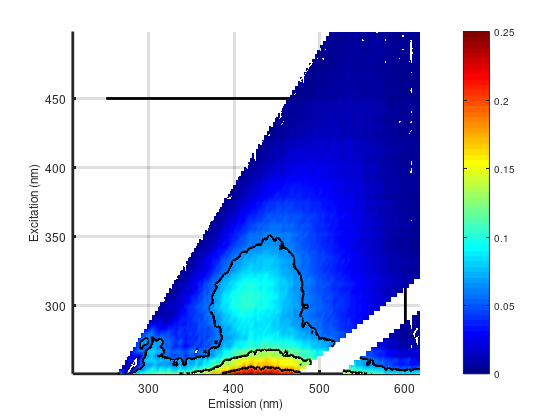

In [3]:
%contour plot over colourmap.
graphics_toolkit ("notebook"); 
makecontourplot(F,em,ex)

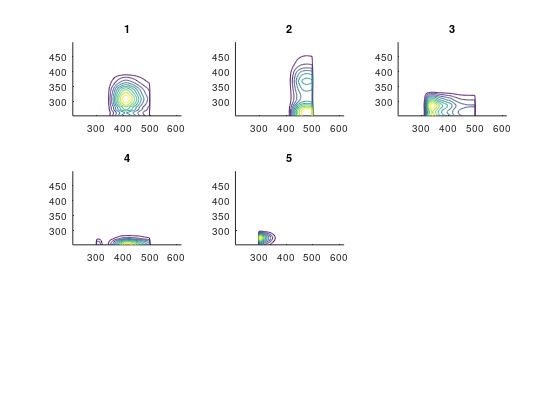

In [4]:
% load the model

%load ID15154.mat %ex 250-500 em 300-350
load ID13953.mat %ex 250-500 em 300-350

% interpolate over this em and ex for the dataset

for i=1:C
    istr=num2str(i);
    txt=['Cem',istr','i=interp1(Cem,Cem',istr,',em); Cem',istr,'i(isnan(Cem',istr,'i))=0;'];
    eval(txt)
    txt=['Cex',istr','i=interp1(Cex,Cex',istr,',ex); Cex',istr,'i(isnan(Cex',istr,'i))=0;'];
    eval(txt)
    %Cex1i=interp1(Cex,Cex1,ex); Cex1i(isnan(Cex1i))=0; 
    %size(Cex1i)
    %size(Cem1i)
    txt=['F',istr,'=Cex',istr,'i''*Cem',istr,'i'';']; eval(txt);
    subplot(3,3,i); hold on;
    txt=['contour(em,ex,F',istr,')']; eval(txt)
    title(istr)
end
    

In [5]:
% fit to a linear model
FnoNaN=F; FnoNaN(isnan(FnoNaN))=0; % get rid of NaN in the original matrix

%fcn=@(p)(sum(sum((FnoNaN-((10^p(1)).*F1+(10^p(2)).*F2+(10^p(3)).*F3+(10^p(4)).*F4+(10^p(5)).*F5)).^2)));
%p0=[2;2;2;2;2]; 
    
runningtxt=['fcn=@(p)(sum(sum((FnoNaN-('];
for i=1:C
    istr=num2str(i);
    runningtxt=[runningtxt,'(10^p(',istr,')).*F',istr,'+'];
    p0(i)=1;
end
runningtxt=runningtxt(1:length(runningtxt)-1); txt=[runningtxt,')).^2)));']; eval(txt);
options=optimset('MaxFunEvals',10000,'display','off','TolFun',1e-5,'TolX',1e-5);
[pmin,fval]=fminsearch(fcn,p0,options); p=10.^pmin

Ffit=zeros(size(F));
for i=1:C
    istr=num2str(i);
    txt=['Ffit=Ffit+p(i)*F',istr,';']; eval(txt);
end
sumF=sum(sum(FnoNaN)); sumFfit=sum(sum(Ffit)); overallfit=100*((sumF-sumFfit)./sumF)
    

p,1,2,3,4,5
1,1.04286,0.611696,0.367902,0.962982,0.265059


overallfit = 22.876


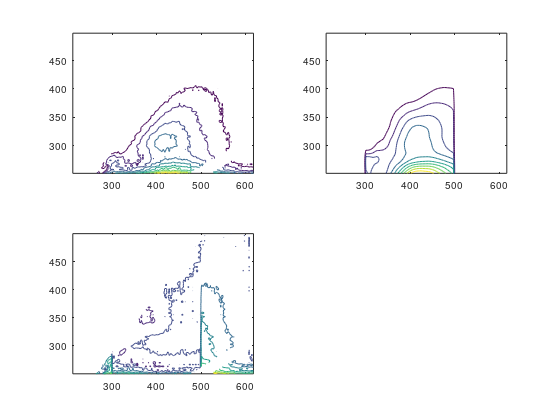

In [6]:
subplot(221)
contour(em,ex,F)
subplot(222)
contour(em,ex,Ffit)
subplot(223)
contour(em,ex,F-Ffit)